In [1]:
from pathlib import Path
import mgmGrowth.utils.flair2nrrd as flair2nrrd

root   = Path("/home/mariopasc/Python/Datasets/Meningiomas/raw/men")
outdir = Path("/home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM")

df = flair2nrrd.batch_convert_flair(root, outdir)
df.head()


WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
/home/mariopasc/Python/misc/miniconda3/envs/mgmGrowth/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
WARNING | Invalid value for VR UI: '1.2.840.11370

,PatientID,Written,Slices,VoxelSpacing,DirectionDet,OutFile,Copied,Reason
0,P1,True,20.0,"(0.8984375, 0.8984374999999999, 6.000000186943...",1.0,/home/mariopasc/Python/Datasets/Meningiomas/ra...,NaN,NaN
1,P12,True,NaN,NaN,NaN,/home/mariopasc/Python/Datasets/Meningiomas/ra...,True,NaN
2,P14,True,25.0,"(0.8984375000000001, 0.8984375000000001, 6.000...",1.0,/home/mariopasc/Python/Datasets/Meningiomas/ra...,NaN,NaN
3,P15,True,24.0,"(0.8984375000000001, 0.8984375000000002, 5.999...",1.0,/home/mariopasc/Python/Datasets/Meningiomas/ra...,NaN,NaN
4,P16,True,28.0,"(0.4688000082970001, 6.000006167542554, 0.4688...",1.0,/home/mariopasc/Python/Datasets/Meningiomas/ra...,NaN,NaN


--- Statistics for T1 (P40) ---
File Path: /home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM/T1/P40/T1_P40.nrrd
Shape: (512, 512, 40)
Voxel Spacing: (array([4.29320319e-01, 1.76259194e-02, 1.77856369e-07]), array([-0.01750644,  0.42640961,  0.05000152]), array([ 0.00477306, -0.1162691 ,  0.99320628]))
Data Type: int16
Intensity Min: 0
Intensity Max: 1336
Intensity Mean: 133.88
Intensity Std Dev: 181.90
------------------------------
--- Statistics for SUSC (P40) ---
File Path: /home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM/SUSC/P40/SUSC_P40.nrrd
Shape: (512, 512, 20)
Voxel Spacing: (array([ 0.42942566, -0.01497979,  0.00247808]), array([ 0.0150673 ,  0.42907074, -0.01730969]), array([-0.02830398,  0.26300125,  6.49461063]))
Data Type: int16
Intensity Min: 0
Intensity Max: 552
Intensity Mean: 86.14
Intensity Std Dev: 114.73
------------------------------
--- Statistics for T2 (P40) ---
File Path: /home/mariopasc/Python/Datasets/Meningio

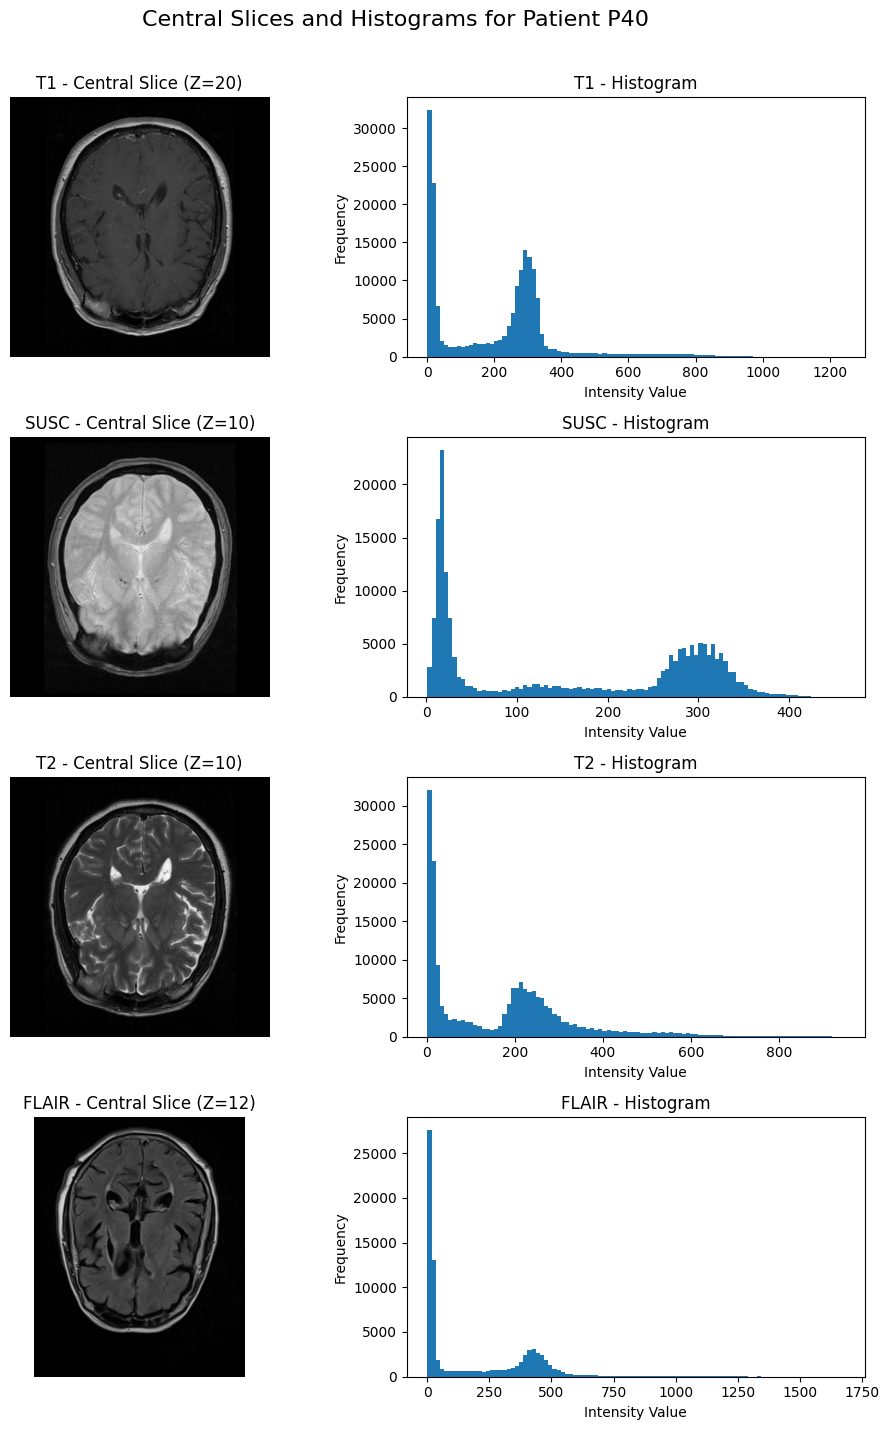

In [23]:
import os
import nrrd
import numpy as np
import matplotlib.pyplot as plt

# Define the base path and pulse sequences
base_path = "/home/mariopasc/Python/Datasets/Meningiomas/raw/Meningioma_Adquisition/RM"
pulses = ["T1", "SUSC", "T2", "FLAIR"]
patient_id = "P40"

# Create a figure with subplots (4 rows, 2 columns)
fig, axes = plt.subplots(len(pulses), 2, figsize=(10, 15))
fig.suptitle(f'Central Slices and Histograms for Patient {patient_id}', fontsize=16)

for i, pulse in enumerate(pulses):
    # Construct the file path
    file_path = os.path.join(base_path, pulse, patient_id, f"{pulse}_{patient_id}.nrrd")

    try:
        # Load the NRRD image
        data, header = nrrd.read(file_path)
        # --- Print Statistics ---
        print(f"--- Statistics for {pulse} ({patient_id}) ---")
        print(f"File Path: {file_path}")
        print(f"Shape: {data.shape}")
        # Extract spacing - check header structure as it might vary
        spacing = header.get('space directions', 'N/A')
        if isinstance(spacing, np.ndarray):
            spacing = tuple(spacing)
        print(f"Voxel Spacing: {spacing}")
        print(f"Data Type: {data.dtype}")
        print(f"Intensity Min: {np.min(data)}")
        print(f"Intensity Max: {np.max(data)}")
        print(f"Intensity Mean: {np.mean(data):.2f}")
        print(f"Intensity Std Dev: {np.std(data):.2f}")
        print("-" * 30)
        # ------------------------

        # Get the central slice index (assuming Z-axis is the last dimension)
        center_slice_idx = data.shape[-1] // 2
        center_slice = data[:, :, center_slice_idx]

        # Plot the central slice
        ax_img = axes[i, 0]
        ax_img.imshow(center_slice.T, cmap='gray', origin='lower')
        ax_img.set_title(f"{pulse} - Central Slice (Z={center_slice_idx})")
        ax_img.axis('off')

        # Plot the histogram of the central slice
        ax_hist = axes[i, 1]
        # Flatten the slice and ignore zero background pixels for a potentially cleaner histogram
        non_zero_pixels = center_slice[center_slice > 0].flatten()
        if non_zero_pixels.size > 0:
             ax_hist.hist(non_zero_pixels, bins=100)
        else:
             ax_hist.hist(center_slice.flatten(), bins=100) # Fallback if all pixels are zero
        ax_hist.set_title(f"{pulse} - Histogram")
        ax_hist.set_xlabel("Intensity Value")
        ax_hist.set_ylabel("Frequency")

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        axes[i, 0].set_title(f"{pulse} - File Not Found")
        axes[i, 0].axis('off')
        axes[i, 1].set_title(f"{pulse} - Histogram (N/A)")
        axes[i, 1].axis('off')
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        axes[i, 0].set_title(f"{pulse} - Error Loading")
        axes[i, 0].axis('off')
        axes[i, 1].set_title(f"{pulse} - Histogram (Error)")
        axes[i, 1].axis('off')


# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap
plt.show()